## KEYWORD CLASSIFICATION BY COMMUNITIES OF THE GRAPH OF SENTENTIALLY CO-OCCURRING KEYWORDS
### Moses Boudourides

In [1]:
import random, operator, itertools, math, nltk, networkx as nx, community, matplotlib.pyplot as plt
from collections import Counter
import pygraphviz
from networkx.drawing.nx_agraph import graphviz_layout
from gensim.summarization import keywords
import warnings
warnings.filterwarnings("ignore", category=RuntimeWarning) 

### The Reuters Dataset

In [2]:
from nltk.corpus import reuters

len(reuters.fileids())

10788

In [3]:
sample_size=50
sid=random.sample([t for t in reuters.fileids() if 'training' in t],sample_size)
docs={s:reuters.raw(s) for s in sid}

### Keywords

https://radimrehurek.com/gensim/summarization/keywords.html

In [4]:
kwd={}
for k,v in docs.items():
    try:
        kw=keywords(v,lemmatize=True).split('\n')
        for i in kw:
            if i!='':
                kwd[k.replace("training/","")]=kw #, words=10  
    except:
        continue
# for k,v in kwd.items():
#     if v!=list(''):
#         print k,v

In [5]:
keyw=[]
for v in kwd.values():
    for vv in v:
        if vv not in keyw:
            keyw.append(vv)
keyw=sorted(keyw)
print len(keyw)
keyw

177


[u'acquisition',
 u'agencies',
 u'approval',
 u'art',
 u'ball',
 u'bankers',
 u'banks',
 u'barge',
 u'barnes',
 u'better',
 u'business',
 u'canadian',
 u'capital',
 u'caterpillar',
 u'cent',
 u'champion',
 u'charged',
 u'comibol',
 u'commercial',
 u'common',
 u'compound',
 u'construction',
 u'contract',
 u'corp',
 u'corporate',
 u'corporation',
 u'costs',
 u'council',
 u'countries',
 u'county',
 u'credit',
 u'cts',
 u'cut',
 u'debt',
 u'december',
 u'deterioration',
 u'developers',
 u'development',
 u'dispute',
 u'dlr contract',
 u'dlrs',
 u'drilling',
 u'economic',
 u'economists',
 u'economy',
 u'effective',
 u'egypt',
 u'egyptian',
 u'elements',
 u'employment',
 u'energy',
 u'estate',
 u'european',
 u'exchange',
 u'executive',
 u'february',
 u'fed',
 u'federal',
 u'financial',
 u'financing',
 u'fountain',
 u'franc net',
 u'gas',
 u'gate',
 u'gatt',
 u'gnp annual',
 u'goods',
 u'group',
 u'harlow',
 u'herring',
 u'hosni',
 u'imports',
 u'industrial',
 u'inflation',
 u'insurance',
 u'j

### The graph of co-occurrent keywords

In [6]:
medges=[]
for k,v in docs.items():
    sent_text = nltk.sent_tokenize(v)
    for sent in sent_text:
        for j in itertools.combinations(keyw, 2):
            if j[0] in sent and j[1] in sent:
                medges.append((j[0],j[1],k.replace("training/","")))
print len(medges),len(set(medges))
medges

1354 1098


[(u'acquisition', u'debt', '3298'),
 (u'acquisition', u'dlrs', '3298'),
 (u'acquisition', u'line', '3298'),
 (u'debt', u'dlrs', '3298'),
 (u'debt', u'line', '3298'),
 (u'dlrs', u'line', '3298'),
 (u'dlrs', u'financing', '3298'),
 (u'dlrs', u'mln', '3298'),
 (u'dlrs', u'offer', '3298'),
 (u'dlrs', u'tender', '3298'),
 (u'financing', u'mln', '3298'),
 (u'financing', u'offer', '3298'),
 (u'financing', u'tender', '3298'),
 (u'mln', u'offer', '3298'),
 (u'mln', u'tender', '3298'),
 (u'offer', u'tender', '3298'),
 (u'financing', u'group', '3298'),
 (u'credit', u'dlrs', '3298'),
 (u'credit', u'financing', '3298'),
 (u'credit', u'mln', '3298'),
 (u'dlrs', u'financing', '3298'),
 (u'dlrs', u'mln', '3298'),
 (u'financing', u'mln', '3298'),
 (u'dlrs', u'offer', '3298'),
 (u'dlrs', u'tender', '3298'),
 (u'dlrs', u'total', '3298'),
 (u'offer', u'tender', '3298'),
 (u'offer', u'total', '3298'),
 (u'tender', u'total', '3298'),
 (u'approval', u'dlrs', '3298'),
 (u'approval', u'fed', '3298'),
 (u'appro

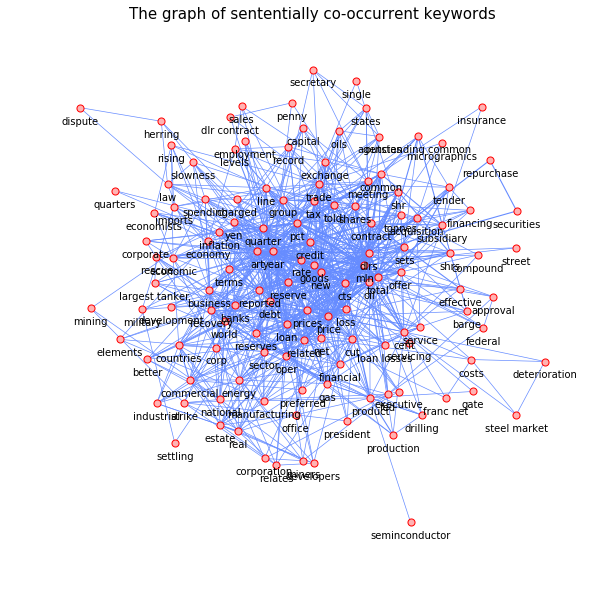

In [11]:
G = nx.MultiGraph()
G.add_edges_from(medges)
weight={(x,y):v for (x, y), v in Counter(G.edges()).items()}
w_edges=[(x,y,z) for (x,y),z in weight.items()]
Gw = nx.Graph()
Gw.add_weighted_edges_from(w_edges)

edge_width=[Gw[u][v]['weight'] for u,v in Gw.edges()]
# elabels = nx.get_edge_attributes(Gw,'weight')
edge_width=[math.log(1+w) for w in edge_width]
# [3*w for w in edge_width] 

figsize=(10,10)
pos=graphviz_layout(Gw) 
node_color="#ffb3b3"
node_border_color="r"
edge_color="#668cff"
G=Gw
plt.figure(figsize=figsize);
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color,node_size=50)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos, edge_color=edge_color,width=edge_width)
# nx.draw_networkx_labels(G, pos)
# nx.draw_networkx_edge_labels(G,pos,edge_labels=elabels);
plt.axis('off');
yoffset = {}
y_off = -10 #0.05  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(G, yoffset,font_size=10);
sst="The graph of sententially co-occurrent keywords"
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1) 

### Clustering keywords as communities of the co-occurrence graph

In [8]:
G=Gw

partition = community.best_partition(G)
# print partition

kk=len(set(partition.values()))
modularity=community.modularity(partition, G, weight='weight')
print 'The graph has', kk, 'Louvain communities and modularity coefficient equal to', modularity

cml=[]
for j in range(kk):
    cj=[]
    for k,v in partition.items():
        if v==j:
            cj.append(k)
    cml.append(cj)
cmd={}
for j in range(kk):
    cmd[tuple(cml[j])]=len(cml[j])
cmd
ocmd=sorted(cmd.iteritems(), key=operator.itemgetter(1), reverse=True)
eocmd=enumerate(ocmd)
commsd={}
louvain_comm_membership={}
for i in eocmd:
    print 'Community', i[0], 'with', i[1][1], 'nodes:', list(i[1][0])
    commsd[i[0]]=i[1][1] 
    ts=list(i[1][0])
    louvain_comm_membership[i[0]]=ts 

The graph has 6 Louvain communities and modularity coefficient equal to 0.310063254601
Community 0 with 34 nodes: [u'yen', u'group', u'better', u'real', u'rescue', u'preferred', u'world', u'countries', u'rising', u'financial', u'national', u'relates', u'terms', u'business', u'commercial', u'largest tanker', u'debt', u'settling', u'goods', u'credit', u'military', u'oper', u'industrial', u'loan', u'service', u'energy', u'mining', u'line', u'financing', u'acquisition', u'estate', u'imports', u'developers', u'banks']
Community 1 with 27 nodes: [u'office', u'executive', u'trade', u'cut', u'inflation', u'barge', u'secretary', u'related', u'rate', u'year', u'new', u'told', u'agencies', u'contract', u'oils', u'meeting', u'prices', u'micrographics', u'penny', u'states', u'dlr contract', u'insurance', u'development', u'oil', u'price', u'president', u'effective']
Community 2 with 19 nodes: [u'pct', u'compound', u'common', u'tender', u'outstanding common', u'shares', u'exchange', u'total', u'cent'

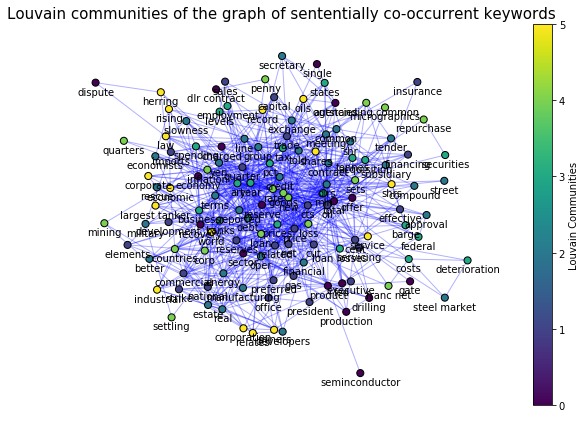

In [9]:
node_color=partition.values()
vmin = min(node_color) #df['color'].min()
vmax = max(node_color) #df['color'].max()
cmap=plt.cm.viridis #plt.cm.coolwarm #plt.cm.Blues #

plt.figure(figsize=(10,7));
node_border_color='k'
nodes = nx.draw_networkx_nodes(G, pos, node_color=node_color,node_size=50, cmap=cmap, vmin=vmin, vmax=vmax)
nodes.set_edgecolor(node_border_color)
nx.draw_networkx_edges(G, pos,edge_color='b',alpha=0.3)
plt.axis('off');
yoffset = {}
y_off = -10 #0.05  # offset on the y axis
for k, v in pos.items():
    yoffset[k] = (v[0], v[1]+y_off)
nx.draw_networkx_labels(G, yoffset,font_size=10);
sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=vmin, vmax=vmax))
sm.set_array([])
cbar = plt.colorbar(sm,label="Louvain Communities") #, orientation='horizontal')
sst="Louvain communities of the graph of sententially co-occurrent keywords"
plt.title(sst,fontsize=15);
plt.margins(x=0.1, y=0.1) 